In [1]:
import pandas as pd
import os

current_dir = os.getcwd()
train_path = os.path.join(current_dir, os.pardir, 'data', 'raw', 'train.csv') 

In [2]:
df = pd.read_csv(train_path)
df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [3]:
len(df)

201917

In [4]:
len(df.dropna())

201917

In [5]:
df['first_active_month'] = pd.to_datetime(df['first_active_month'], format='%Y-%m')

In [6]:
df['first_active_month'].min()

Timestamp('2011-11-01 00:00:00')

In [7]:
df['first_active_month'].max()

Timestamp('2018-02-01 00:00:00')

In [43]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

def plot_counts(df, by, column):
    plt.plot(df.groupby([by]).count()[column])

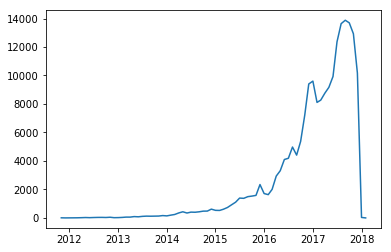

In [44]:
plot_counts(df,'first_active_month','card_id')

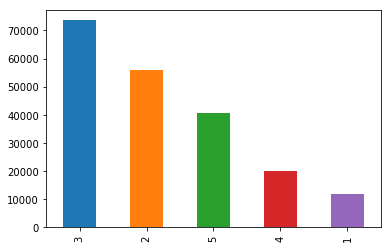

In [77]:
df.feature_1.value_counts().plot(kind='bar')

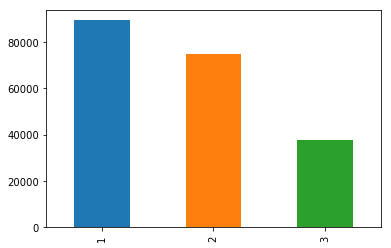

In [78]:
df.feature_2.value_counts().plot(kind='bar')

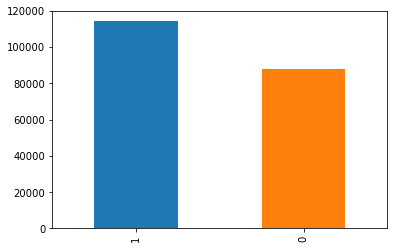

In [79]:
df.feature_3.value_counts().plot(kind='bar')

In [10]:
historical_path = os.path.join(current_dir, os.pardir, 'data', 'raw', 'historical_transactions.csv')
hist_trans = pd.read_csv(historical_path)

In [11]:
hist_trans.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [30]:
len(hist_trans)

29112361

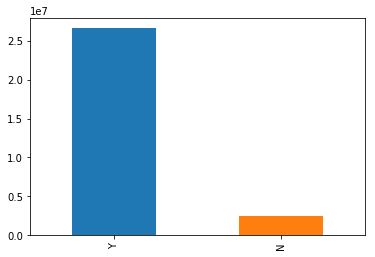

In [46]:
hist_trans['authorized_flag'].value_counts().plot(kind='bar')

In [13]:
hist_trans['card_id'].nunique()

325540

In [14]:
df['card_id'].nunique()

201917

In [18]:
df[~df.card_id.isin(hist_trans['card_id'])] 

,first_active_month,card_id,feature_1,feature_2,feature_3,target


In [52]:
hist_trans['city_id'].nunique()

308

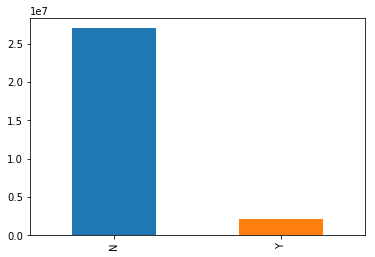

In [48]:
hist_trans.category_1.unique()
hist_trans['category_1'].value_counts().plot(kind='bar')

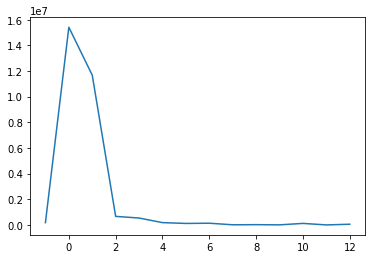

In [33]:
install_counts = hist_trans[(hist_trans.installments < 999)].groupby(['installments']).count()['card_id']
plt.plot(install_counts)

In [24]:
hist_trans.installments.unique()

array([  0,   1,   5,   3,   4,   2,  -1,  10,   6,  12,   8,   7,   9,
        11, 999], dtype=int64)

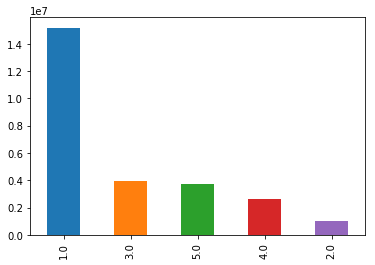

In [49]:
hist_trans.category_2.unique()
hist_trans['category_2'].value_counts().plot(kind='bar')

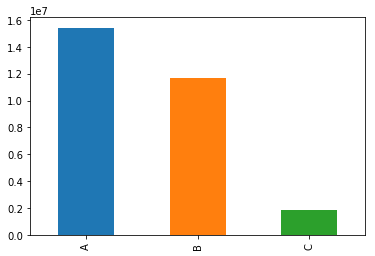

In [50]:
hist_trans.category_3.unique()
hist_trans['category_3'].value_counts().plot(kind='bar')

In [37]:
hist_trans.merchant_category_id.nunique()

327

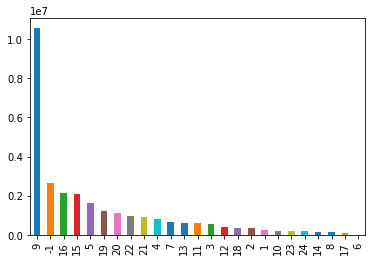

In [51]:
hist_trans['state_id'].value_counts().plot(kind='bar')

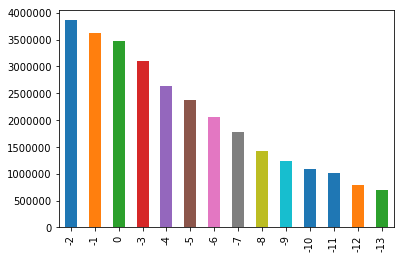

In [53]:
hist_trans['month_lag'].value_counts().plot(kind='bar')

In [55]:
hist_trans['purchase_date'].dtype

dtype('O')

In [68]:
dates = pd.to_datetime(hist_trans['purchase_date'])

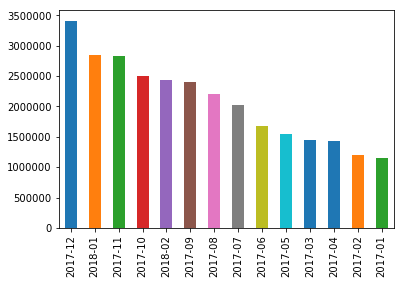

In [71]:
hist_trans['purchase_month'] = dates.dt.to_period('M')
hist_trans['purchase_month'].value_counts().plot(kind='bar')

In [73]:
new_merch_path = os.path.join(current_dir, os.pardir, 'data', 'raw', 'new_merchant_transactions.csv') 

new_merch = pd.read_csv(new_merch_path)

In [74]:
new_merch.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [75]:
new_merch[~new_merch.card_id.isin(hist_trans['card_id'])] 

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id


In [76]:
new_merch[~new_merch.merchant_id.isin(hist_trans['merchant_id'])] 

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
17,Y,C_ID_ef55cf8d4b,69,N,1,B,560,M_ID_a1183a4e5e,2,-0.690228,2018-04-22 15:00:27,1.0,9,34
46,Y,C_ID_fb0875cd28,331,N,0,A,274,M_ID_3b3ec0f162,1,-0.565087,2018-03-16 08:32:37,1.0,9,36
113,Y,C_ID_1f236c50e6,4,N,1,B,248,M_ID_df85bd38ef,1,-0.620685,2018-03-28 21:19:48,2.0,10,8
192,Y,C_ID_be71a60d23,333,N,0,A,307,M_ID_1fb0d13ea0,1,-0.716855,2018-03-08 18:27:49,1.0,9,19
296,Y,C_ID_e4d60467c2,69,N,1,B,454,M_ID_491c8d0329,1,-0.739395,2018-03-20 18:47:36,1.0,9,39
338,Y,C_ID_18c53fe97a,17,N,1,B,847,M_ID_0ebba6ef07,2,-0.637815,2018-04-03 10:31:43,4.0,22,12
430,Y,C_ID_0cb8b21999,302,N,2,C,34,M_ID_b9fe9e2731,1,-0.506484,2018-03-13 17:11:35,1.0,15,38
449,Y,C_ID_b25d492593,212,N,1,B,417,M_ID_e61eb69788,2,-0.716855,2018-04-13 11:54:46,4.0,4,27
455,Y,C_ID_f0653560a1,19,N,0,A,783,M_ID_b3cb78a29b,2,-0.631204,2018-04-10 06:47:55,1.0,9,19
497,Y,C_ID_6b8caeecbc,283,N,1,B,80,M_ID_e447ae304b,2,-0.688154,2018-04-15 13:23:28,1.0,9,37
